# Problem Description

Breast cancer is considered one of the most common cancers in women caused by various factors. Machine learning has the potential to predict breast cancer based on features hidden in data. The objective of this project is to analyze data and build supervisory machine learning models to predict if the tumor is benign or malignant based on various tumor features. It is a binary class classification problem.


## Data Source 
Publicly available breast cancer dataset from the UCI Machine learning Repository 

In [44]:
#import required libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory data analysis (EDA)

### 1. Load Dataset

In [26]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

### 2. Understanding the big picture

In [27]:
# First 5 rows
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [28]:
#Dimensionality of dataset (rows and columns)
df.shape

(699, 11)

This dataset has 699 patient records and each record has 11 attributes

In [29]:
# Short summary of our dataset (column names, data type, non-null values and memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   uniform_cell_size       699 non-null    int64 
 3   uniform_cell_shape      699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epithelial_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


As we see this dataset has 11 columns. The first column (id) is a record identifier and last column (class) is the target attribute which labels the tumor as benign or malignant. Most the data types are numbers except one attribute (bare_nuclei) which is of object type. We will explore more on this attribute.

In [30]:
# Descriptive the summary statistics of the dataset
df.describe()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### 3. Prepare the data
At this stage we want to start cleaning our dataset in order to continue the analysis. Some of the questions we will ask ourselves are
Are there any useless or redundant variables? 
Are there any duplicate columns? 
Does the nomenclature make sense?
Are there columns with missing values?

In [31]:
# Replace ? values with -99999 
df.replace('?',-99999, inplace=True)
print(df.axes)

#drop id column as id column is just a sequence and no meaning for prediction
#df.drop(['id'], 1, inplace=True)
df=df.drop('id', axis=1)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [32]:
pd.value_counts(df.bare_nuclei)

1         402
10        132
2          30
5          30
3          28
8          21
4          19
-99999     16
9           9
7           8
6           4
Name: bare_nuclei, dtype: int64

There are 16 records which had unknown value and got assigned -99999. We need to remove these records so that they will not influence the prediction

In [33]:
df[["bare_nuclei"]] = df[["bare_nuclei"]].apply(pd.to_numeric)
df = df[df.bare_nuclei != -99999]

In [34]:
#Dimensionality of dataset (rows and columns)
df.shape

(683, 10)

Now the final dataset has 683 rows and 10 columns

### 4. Understanding of the variables

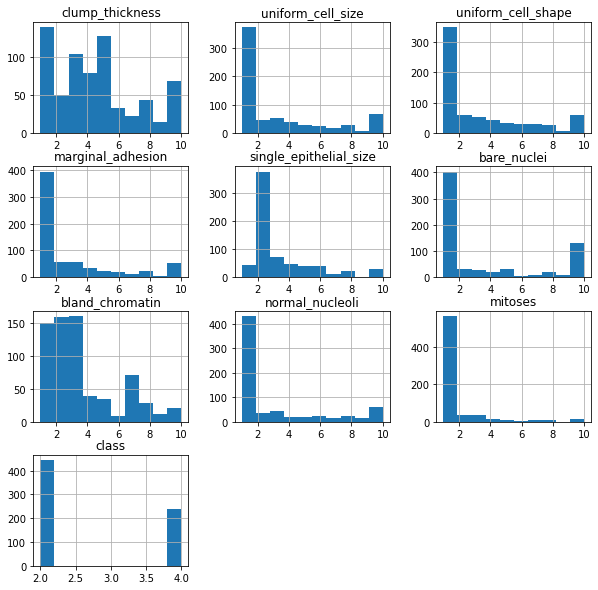

In [35]:
# Plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()

As we see here. all the variables have values between 1 and 10. The distribution is skewed towards the left, meaning has most of the 
values bwtween 1 and 5. The target variable (class) has only two values 2 (benign) and 4 (malignant). Around two thirds of tumors are
benign and one third is malignant.

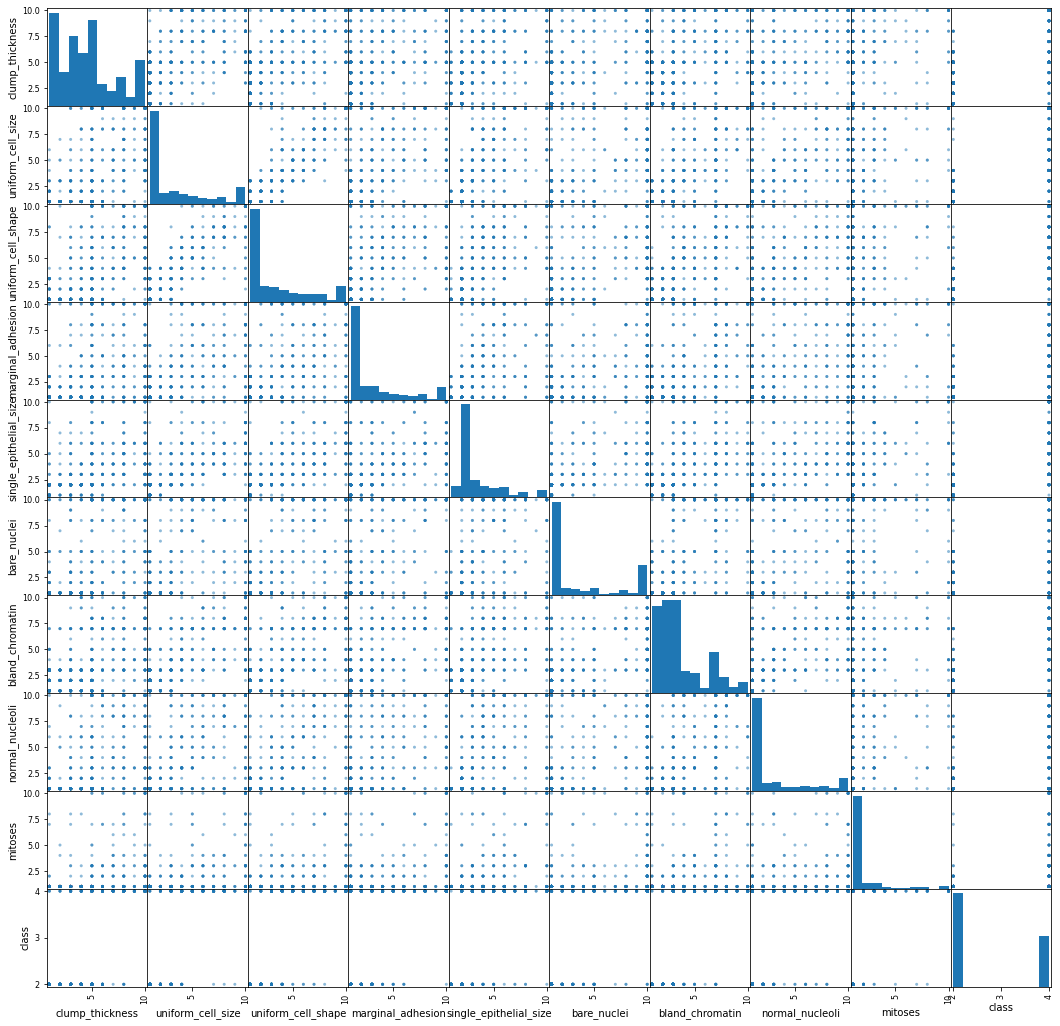

In [36]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

As we see from the scatter plot above, none of the variables have a strong positive or negative correlation. 

## Analysis (model building and training)

In this step the dataset was split to two sets using the train-test split method (80% for training and 20% for testing). Two supervised machine learning models, K Nearest Neighbor (KNN) and Support Vector Machine (SVM) were built using training data and validated with test data. 

In [37]:
# Create X and Y datasets for training
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test  =train_test_split(X,y,test_size=0.2)

<ipython-input-37-e94f665ff86d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['class'],1))


In [38]:
# Testing Options
seed = 9
scoring = 'accuracy'

In [39]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.970640 (0.022079)
SVM: 0.963333 (0.016455)


In [40]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    

KNN
0.9781021897810219
              precision    recall  f1-score   support

           2       0.99      0.98      0.98        95
           4       0.95      0.98      0.96        42

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.97       137
weighted avg       0.98      0.98      0.98       137

SVM
0.9781021897810219
              precision    recall  f1-score   support

           2       1.00      0.97      0.98        95
           4       0.93      1.00      0.97        42

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.97       137
weighted avg       0.98      0.98      0.98       137



<AxesSubplot:>

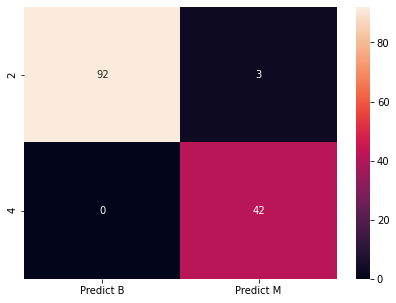

In [48]:
## Results
cm=metrics.confusion_matrix(y_test,predictions,labels=[2,4])
df_cm=pd.DataFrame(cm,index=[i for i in [2,4]], columns=[i for i in ['Predict B','Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)


## Results

The performance of the models shown based on the accuracy score and classification report demonstrated that both KNN and SVM are equally good in predicting breast cancer. On the validation set, KNN accuracy was 0.97 and SVM also had an accuracy score of 0.97.

In the case of predicting malignant tumor, SVM has a precision score of 93% and recall of 100%. Whereas KNN has a precision score of 95% and recall of 98%. SVM has a F1 score of 96% and KNN has a F1 score of 97%. Based on the confusion matrix, the model mislabed only 3 malignant cases out of 137 total cases.

## Conclusion

As demonstrated in this project, a robust machine-learning model could predict breast cancer with good accuracy and can help healthcare professionals in early detection of this disease and help slow down the progress of the disease and reduce the mortality rate through appropriate therapeutic interventions at the right time. 

In the current project, limitations are considered as follows: modeling based on records of only one database (UCI database), and the lack of access to other dataset (e.g. genetic data) could influence the prediction. However, different machine learning approaches were used considering laboratory and mammography features, resulting in comparing the performance of two machine learning methods (KNN and SVM) in predicting breast cancer.


Applying different machine learning approaches, accessibility to bigger datasets from different areas, and considering key features from a variety of relevant data sources could improve the performance of modeling.

